In [5]:
import os
import orchest
import pandas as pd

from sqlalchemy import create_engine

In [6]:
postgres_service = orchest.get_service("postgres"); postgres_service 

{'name': 'postgres',
 'image': 'postgres',
 'command': '',
 'env_variables': {'POSTGRES_DB': 'jaffle_shop',
  'POSTGRES_HOST_AUTH_METHOD': 'trust'},
 'env_variables_inherit': [],
 'internal_hostname': 'internal-service-postgres-5c9a40f9-7b21ba4a',
 'external_urls': {},
 'base_paths': {}}

In [14]:
engine = create_engine(f'postgresql://postgres@{postgres_service["internal_hostname"]}:5432/jaffle_shop')

In [15]:
def all_tables(con):
    query = """SELECT *
    FROM pg_catalog.pg_tables
    WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema';"""
    
    return pd.read_sql(query, con)

In [16]:
all_tables(engine)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,dbt_alice,raw_orders,postgres,None,False,False,False,False
1,dbt_alice,customers,postgres,None,False,False,False,False
2,dbt_alice,raw_customers,postgres,None,False,False,False,False
3,dbt_alice,orders,postgres,None,False,False,False,False
4,dbt_alice,raw_payments,postgres,None,False,False,False,False


In [20]:
orders = pd.read_sql("SELECT * FROM dbt_alice.orders", engine)
customers = pd.read_sql("SELECT * FROM dbt_alice.customers", engine)

In [21]:
orders

,order_id,customer_id,order_date,status,credit_card_amount,coupon_amount,bank_transfer_amount,gift_card_amount,amount
0,1,1,2018-01-01,returned,10,0,0,0,10
1,2,3,2018-01-02,completed,20,0,0,0,20
2,3,94,2018-01-04,completed,0,1,0,0,1
3,4,50,2018-01-05,completed,0,25,0,0,25
4,5,64,2018-01-05,completed,0,0,17,0,17
...,...,...,...,...,...,...,...,...,...
94,95,27,2018-04-04,placed,0,24,0,0,24
95,96,90,2018-04-06,placed,0,0,0,17,17
96,97,89,2018-04-07,placed,0,0,14,0,14
97,98,41,2018-04-07,placed,0,0,10,0,10


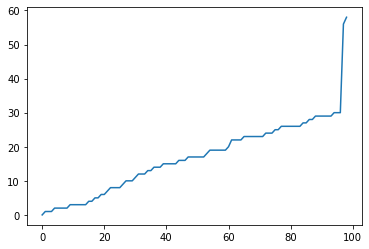

In [28]:
orders['amount'].sort_values().reset_index(drop=True).plot()

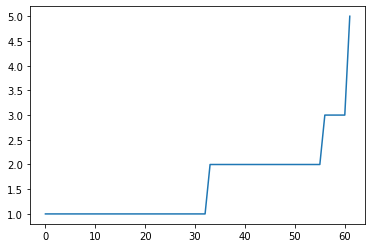

In [29]:
customers['number_of_orders'].dropna().sort_values().reset_index(drop=True).plot()